In [1]:
from PIL import Image

import torch
import numpy as np
from PIL import Image
import torch
import os
import torchvision.transforms as T
device = torch.device('cuda') 
from torch.utils.data import DataLoader



In [2]:
img_transforms = T.Compose([T.Resize((512,512), interpolation=2),T.RandomHorizontalFlip(p=0.5)
                            , T.RandomRotation(12), T.RandomVerticalFlip(p=0.5),
                            T.ToTensor()])

In [3]:
import torch
from torch.utils.data import Dataset

from torchvision.transforms import ToTensor

import os
import pandas as pd
from torchvision.io import read_image
import pandas as pd
import numpy as np




class Loading_train(Dataset):
    
    def __init__(self):
        """
        This should load everything from the directory that matches the test df
        """
        #Define dataset
        self.selected_dataset_dir = os.path.join(os.path.join(os.getcwd()+'//together'))
        self.all_filenames = os.listdir(self.selected_dataset_dir)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd()+'/df_train1.csv'))
        self.all_filenames = [file for file in self.all_labels['id'] if file in self.all_filenames]
        self.label_meanings = self.all_labels.columns.values.tolist()
    def __len__(self):
        return len(self.all_filenames)
        
    def __getitem__(self, idx):
        #Loads the image files and reads their labels
        selected_filename = self.all_filenames[idx]
        imagepil = Image.open(os.path.join(self.selected_dataset_dir,selected_filename))
        
        image = img_transforms(imagepil)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd()+'/df_train1.csv'))
        label= self.all_labels['label'][idx]
    
        
        sample = {'data':image, #preprocessed image, for input into NN
                'label':label,
                'img_idx':idx, 'sample_name':selected_filename}
        return(sample) 

In [4]:

class Loading_val(Dataset):
    
    def __init__(self):
        """
        This should load everything from the directory that matches the test df
        """
        #Define dataset
        self.selected_dataset_dir = os.path.join(os.path.join(os.getcwd()+'//together'))
        self.all_filenames = os.listdir(self.selected_dataset_dir)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd()+'/df_val1.csv'))
        self.all_filenames = [file for file in self.all_labels['id'] if file in self.all_filenames]
        self.label_meanings = self.all_labels.columns.values.tolist()
    def __len__(self):
        return len(self.all_filenames)
        
    def __getitem__(self, idx):
        #Loads the image files and reads their labels
        selected_filename = self.all_filenames[idx]
        imagepil = Image.open(os.path.join(self.selected_dataset_dir,selected_filename))
        
        image = img_transforms(imagepil)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd()+'/df_val1.csv'))
        label= self.all_labels['label'][idx]
    
        
        sample = {'data':image, #preprocessed image, for input into NN
                'label':label,
                'img_idx':idx, 'sample_name':selected_filename}
        return(sample) 

In [5]:

class Loading_test(Dataset):
    
    def __init__(self):
        """
        This should load everything from the directory that matches the test df
        """
        #Define dataset
        self.selected_dataset_dir = os.path.join(os.path.join(os.getcwd()+'//together'))
        self.all_filenames = os.listdir(self.selected_dataset_dir)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd()+'/df_test1.csv'))
        self.all_filenames = [file for file in self.all_labels['id'] if file in self.all_filenames]
        self.label_meanings = self.all_labels.columns.values.tolist()
    def __len__(self):
        return len(self.all_filenames)
        
    def __getitem__(self, idx):
        #Loads the image files and reads their labels
        selected_filename = self.all_filenames[idx]
        imagepil = Image.open(os.path.join(self.selected_dataset_dir,selected_filename))
        
        image = img_transforms(imagepil)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd()+'/df_test1.csv'))
        label= self.all_labels['label'][idx]
    
        
        sample = {'data':image, #preprocessed image, for input into NN
                'label':label,
                'img_idx':idx, 'sample_name':selected_filename}
        return(sample) 

In [6]:
ah = Loading_test()

In [7]:
device = torch.device('cuda') 

In [8]:
import torch
print(torch.__version__)

2.1.0+cu121


In [9]:
torch.cuda.empty_cache()

In [10]:
"""import torch.nn as nn
import torch.nn.functional as F


class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.conv = nn.Sequential(
        nn.Conv2d(1, 20, kernel_size = (1,1)),
        nn.Conv2d(20, 50, kernel_size = (1,1)),
        nn.Conv2d(50, 20, kernel_size = (1,1)),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(20, 20, kernel_size = (1,1)),
        nn.Conv2d(20, 10, kernel_size = (1,1)),
        torch.nn.BatchNorm2d(10),
        nn.Dropout(p=0.05),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(10, 10, kernel_size = (1,1)),
        nn.Conv2d(10, 10, kernel_size = (1,1)),
        nn.Conv2d(10, 10, kernel_size = (1,1)),
        nn.Conv2d(10, 5, kernel_size = (1,1)),
        nn.Conv2d(5, 4, kernel_size = (1,1)),
        torch.nn.BatchNorm2d(4), 
        nn.LeakyReLU(inplace=True),
        nn.Dropout(p=0.05),
        torch.nn.MaxPool2d((2, 2)), 
        nn.Conv2d(4, 3, kernel_size = (1,1)),
        nn.Dropout(p=0.05), 
        torch.nn.MaxPool2d((2, 2)),    
        nn.Conv2d(3, 2, kernel_size = (1,1)),
        torch.nn.MaxPool2d((2, 2)), 
        torch.nn.BatchNorm2d(2),
        nn.LeakyReLU(inplace=True))
        self.fc = nn.Linear(in_features=8192,out_features=4096)
        self.fc1 = nn.Linear(in_features=4096,out_features=1)


    def forward(self, x):
        x= self.conv(x)
        #x = F.max_pool2d(F.relu(self.conv(x)),4,4)
        #x = F.max_pool2d(F.relu(self.conv1(x)),2,2)
        #x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = torch.flatten(x,start_dim=1,end_dim=-1)
        
        x=self.fc(x)
        x=self.fc1(x)

        
       # x=self.fc1(x)
        return x


model = Modelo() """

'import torch.nn as nn\nimport torch.nn.functional as F\n\n\nclass Modelo(nn.Module):\n    def __init__(self):\n        super(Modelo, self).__init__()\n        self.conv = nn.Sequential(\n        nn.Conv2d(1, 20, kernel_size = (1,1)),\n        nn.Conv2d(20, 50, kernel_size = (1,1)),\n        nn.Conv2d(50, 20, kernel_size = (1,1)),\n        nn.LeakyReLU(inplace=True),\n        nn.Conv2d(20, 20, kernel_size = (1,1)),\n        nn.Conv2d(20, 10, kernel_size = (1,1)),\n        torch.nn.BatchNorm2d(10),\n        nn.Dropout(p=0.05),\n        nn.LeakyReLU(inplace=True),\n        nn.Conv2d(10, 10, kernel_size = (1,1)),\n        nn.Conv2d(10, 10, kernel_size = (1,1)),\n        nn.Conv2d(10, 10, kernel_size = (1,1)),\n        nn.Conv2d(10, 5, kernel_size = (1,1)),\n        nn.Conv2d(5, 4, kernel_size = (1,1)),\n        torch.nn.BatchNorm2d(4), \n        nn.LeakyReLU(inplace=True),\n        nn.Dropout(p=0.05),\n        torch.nn.MaxPool2d((2, 2)), \n        nn.Conv2d(4, 3, kernel_size = (1,1)),\n  

In [11]:
import torch.nn as nn
import torch.nn.functional as F


class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.conv = nn.Sequential(
        nn.Conv2d(1, 20, kernel_size = (1,1)),
        nn.Conv2d(20, 50, kernel_size = (1,1)),
        nn.Conv2d(50, 50, kernel_size = (1,1)),
        nn.Conv2d(50, 50, kernel_size = (1,1)),
        nn.Conv2d(50, 50, kernel_size = (1,1)),
        nn.Conv2d(50, 20, kernel_size = (1,1)),
        nn.Conv2d(20, 20, kernel_size = (1,1)),
        nn.Conv2d(20, 10, kernel_size = (1,1)),
        torch.nn.BatchNorm2d(10),
        nn.Dropout(p=0.05),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(10, 10, kernel_size = (1,1)),
        nn.Conv2d(10, 10, kernel_size = (1,1)),
        nn.Conv2d(10, 10, kernel_size = (1,1)),
        nn.Conv2d(10, 10, kernel_size = (1,1)),
        nn.Conv2d(10, 10, kernel_size = (1,1)),
        nn.Conv2d(10, 5, kernel_size = (1,1)),
        nn.Conv2d(5, 4, kernel_size = (1,1)),
        torch.nn.BatchNorm2d(4), 
        nn.LeakyReLU(inplace=True),
        nn.Dropout(p=0.05),
        torch.nn.MaxPool2d((2, 2)), 
        nn.Conv2d(4, 3, kernel_size = (1,1)),
        nn.Dropout(p=0.05), 
        torch.nn.MaxPool2d((2, 2)),    
        nn.Conv2d(3, 2, kernel_size = (1,1)),
        torch.nn.MaxPool2d((2, 2)), 
        torch.nn.BatchNorm2d(2))
        self.fc = nn.Linear(in_features=8192,out_features=4096)
        self.fc1 = nn.Linear(in_features=4096,out_features=1)


    def forward(self, x):
        x= self.conv(x)
        #x = F.max_pool2d(F.relu(self.conv(x)),4,4)
        #x = F.max_pool2d(F.relu(self.conv1(x)),2,2)
        #x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = torch.flatten(x,start_dim=1,end_dim=-1)
        x=self.fc(x)
        x=self.fc1(x)
       # x=self.fc1(x)
        return x


model = Modelo()

In [12]:
model.to(device)

Modelo(
  (conv): Sequential(
    (0): Conv2d(1, 20, kernel_size=(1, 1), stride=(1, 1))
    (1): Conv2d(20, 50, kernel_size=(1, 1), stride=(1, 1))
    (2): Conv2d(50, 50, kernel_size=(1, 1), stride=(1, 1))
    (3): Conv2d(50, 50, kernel_size=(1, 1), stride=(1, 1))
    (4): Conv2d(50, 50, kernel_size=(1, 1), stride=(1, 1))
    (5): Conv2d(50, 20, kernel_size=(1, 1), stride=(1, 1))
    (6): Conv2d(20, 20, kernel_size=(1, 1), stride=(1, 1))
    (7): Conv2d(20, 10, kernel_size=(1, 1), stride=(1, 1))
    (8): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Dropout(p=0.05, inplace=False)
    (10): LeakyReLU(negative_slope=0.01, inplace=True)
    (11): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
    (12): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
    (13): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
    (14): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
    (15): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
    (16): Conv2

In [13]:
loss_fn_=nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr= 5.76864110205491e-05)

In [14]:
from torchvision import models
from torchsummary import summary


print(summary(model, (1, 512, 512)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 20, 512, 512]              40
            Conv2d-2         [-1, 50, 512, 512]           1,050
            Conv2d-3         [-1, 50, 512, 512]           2,550
            Conv2d-4         [-1, 50, 512, 512]           2,550
            Conv2d-5         [-1, 50, 512, 512]           2,550
            Conv2d-6         [-1, 20, 512, 512]           1,020
            Conv2d-7         [-1, 20, 512, 512]             420
            Conv2d-8         [-1, 10, 512, 512]             210
       BatchNorm2d-9         [-1, 10, 512, 512]              20
          Dropout-10         [-1, 10, 512, 512]               0
        LeakyReLU-11         [-1, 10, 512, 512]               0
           Conv2d-12         [-1, 10, 512, 512]             110
           Conv2d-13         [-1, 10, 512, 512]             110
           Conv2d-14         [-1, 10, 5

In [15]:
training1=Loading_train()
val1=Loading_val()
test1=Loading_test()


train_dataloader = DataLoader(training1, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val1, batch_size=16, shuffle=True)


In [16]:
test_dataloader = DataLoader(test1, batch_size=10, shuffle=True)

In [17]:
from torchvision.transforms import v2
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torchvision.io import read_image
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Normalize, ToTensor
from ignite.engine import Engine, Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss
from ignite.handlers import ModelCheckpoint
from ignite.contrib.handlers import TensorboardLogger, global_step_from_engine
from ignite.handlers import Timer, BasicTimeProfiler, HandlersTimeProfiler
from torch.optim.lr_scheduler import ExponentialLR
from torch.optim.lr_scheduler import LinearLR
torch_lr_scheduler = LinearLR(optimizer=optimizer,start_factor=0.99, end_factor=1.0)
from ignite.handlers import create_lr_scheduler_with_warmup
from ignite.engine import Engine, Events, create_supervised_trainer, create_supervised_evaluator

In [39]:
counter = 0
for i,batch in enumerate(val_dataloader):
    x,y = batch['data'],batch['label']
    x=x.to(device)
    y=y.to(device)
    outputs,_=(model(x),y)
    outputs = outputs.squeeze()
    outputs=torch.sigmoid(outputs)
    outputs=outputs.cpu().detach()
    outputs=outputs.round()
    y=y.cpu().detach().float()
    print((outputs))
    print((y))
    counter +=1
    if counter ==1:
        break

tensor([1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.])
tensor([1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.])


In [18]:
def update_model(engine, batch):
    model.train()
    data,label = batch['data'].float(),batch['label']
    optimizer.zero_grad()
    data=data.to(device)
    label=label.to(device)
    #print(label.get_device())
    #print(data.get_device())
    outputs,_=(model(data),label)
    outputs=outputs.squeeze()
    loss = loss_fn_(outputs, label.float())
    loss.backward()
    optimizer.step()
    return loss.item()

trainer = Engine(update_model)


val_metrics = {
    "accuracy": Accuracy(),
    "loss": Loss(loss_fn_)
}


def validation_step(engine, batch):
    model.eval()
    with torch.no_grad():
        x, y = batch['data'].float(),batch['label'].float()
        x=x.to(device)
        y=y.to(device)
        outputs,_=(model(x),y)
        outputs = outputs.squeeze()
        outputs=torch.sigmoid(outputs)
        outputs=outputs.cpu().detach()
        outputs=outputs.round()
        y=y.cpu().detach().long()

    return outputs.long(), y
    
    
evaluator = Engine(validation_step)
scheduler = create_lr_scheduler_with_warmup(torch_lr_scheduler,
                                            warmup_start_value=0.0000005,
                                            warmup_end_value=5.76864110205491e-05,
                                            warmup_duration=10)

from ignite.metrics import Accuracy
from ignite.metrics import Precision, Recall

precision = Precision()


Accuracy().attach(evaluator, "accuracy")
Precision().attach(evaluator,'precision')
Recall(average='weighted').attach(evaluator,'recall')


    

@trainer.on(Events.ITERATION_COMPLETED(every=500))
def log_training(engine):
    batch_loss = engine.state.output
    lr = optimizer.param_groups[0]['lr']
    e = engine.state.epoch
    n = engine.state.max_epochs
    i = engine.state.iteration
    print("Epoch {}/{} : {} - batch loss: {}, lr: {}".format(e, n, i, batch_loss, lr))
def print_lr():
    print(optimizer.param_groups[0]["lr"])
    
    
    
    
    
from ignite.handlers import Timer, BasicTimeProfiler, HandlersTimeProfiler    
from ignite.engine import Events

validate_every = 1


@trainer.on(Events.EPOCH_COMPLETED(every=validate_every))
def run_validation():
    evaluator.run(val_dataloader)
    
@trainer.on(Events.EPOCH_COMPLETED(every=validate_every))
def log_validation():
    ugh=[]
    metrics = evaluator.state.metrics
    print(f"Epoch: {trainer.state.epoch},  Accuracy: {metrics['accuracy']},  Precision: {metrics['precision']}, recall: {metrics['recall']}")


def score_function(engine):
    return engine.state.metrics["accuracy"]


model_checkpoint = ModelCheckpoint(
    "checkpoint",
    n_saved=25,
    filename_prefix="best",
    score_function=score_function,
    score_name="accuracy",
    global_step_transform=global_step_from_engine(trainer),
)
  
evaluator.add_event_handler(Events.COMPLETED, model_checkpoint, {"model": model})

tb_logger = TensorboardLogger(log_dir="tb-logger")

tb_logger.attach_output_handler(
    trainer,
    event_name=Events.ITERATION_COMPLETED(every=500),
    tag="training",
    output_transform=lambda loss: {"batch_loss": loss},
)

for tag, evaluator in [("training", trainer), ("validation", evaluator)]:
    tb_logger.attach_output_handler(
        evaluator,
        event_name=Events.EPOCH_COMPLETED,
        tag=tag,
        metric_names="all",
        global_step_transform=global_step_from_engine(trainer),
    )
trainer.add_event_handler(Events.EPOCH_STARTED, scheduler)
trainer.run(train_dataloader, max_epochs=60)

Epoch 1/60 : 500 - batch loss: 0.7795792818069458, lr: 5e-07
Epoch 1/60 : 1000 - batch loss: 0.817074716091156, lr: 5e-07
Epoch 1/60 : 1500 - batch loss: 0.7361571788787842, lr: 5e-07
Epoch: 1,  Accuracy: 0.6516990291262136,  Precision: 0.5932835820895522, recall: 0.6516990291262136
Epoch 2/60 : 2000 - batch loss: 0.5154292583465576, lr: 6.854045668949901e-06
Epoch 2/60 : 2500 - batch loss: 0.3956303298473358, lr: 6.854045668949901e-06
Epoch 2/60 : 3000 - batch loss: 0.5570557117462158, lr: 6.854045668949901e-06
Epoch 2/60 : 3500 - batch loss: 0.5822383761405945, lr: 6.854045668949901e-06
Epoch: 2,  Accuracy: 0.6674757281553398,  Precision: 0.6289719626168224, recall: 0.6674757281553398
Epoch 3/60 : 4000 - batch loss: 0.25087717175483704, lr: 1.3208091337899801e-05
Epoch 3/60 : 4500 - batch loss: 1.094740629196167, lr: 1.3208091337899801e-05
Epoch 3/60 : 5000 - batch loss: 0.8651701807975769, lr: 1.3208091337899801e-05
Epoch 3/60 : 5500 - batch loss: 0.3866313695907593, lr: 1.320809133

State:
	iteration: 115380
	epoch: 60
	epoch_length: 1923
	max_epochs: 60
	output: 0.6344990134239197
	batch: <class 'dict'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

In [ ]:
accuracy10=[]
labeling = []
predictions =[]

from torcheval.metrics.functional import binary_accuracy
from torcheval.metrics.functional.classification import binary_recall
from torcheval.metrics.functional.aggregation.auc import auc
from torcheval.metrics.functional import binary_precision
from torcheval.metrics.functional import binary_accuracy
from torcheval.metrics.functional import binary_f1_score
from torcheval.metrics.functional.classification import binary_recall
from torcheval.metrics.functional import binary_accuracy
from sklearn import metrics
from sklearn.metrics import roc_curve

for j in os.listdir("C:\\Users\\amcfa\Desktop\\NLST_additional\\checkpoint"):
    PATH=os.path.join("C:\\Users\\amcfa\\Desktop\\NLST_additional\\checkpoint",j)
    model.load_state_dict(torch.load(PATH))
    for i, batch in enumerate(test_dataloader):
        model.eval()
        data,label = batch['data'].float(),batch['label']
        data=data.to(device)
        label=label.to(device)
        y_logits,label=(model(data),label)
        test_pred=y_logits.squeeze(-1)
        test_pred=torch.sigmoid(test_pred)
        test_pred=test_pred.cpu().detach()
        test_pred=test_pred.round()
        test_pred1=test_pred.cpu().detach()
        label=label.cpu().detach()
        arfs=binary_accuracy(test_pred, label, threshold=0.7)
        test_pred2=arfs.detach().numpy()
        f1_score=binary_f1_score(test_pred, label, threshold=0.65)
        f1_rec=f1_score.detach().numpy()
        ats=binary_recall(test_pred, label.round(), threshold=0.90)
        bin_rec=ats.detach().numpy()
        prec1=binary_precision(test_pred, label, threshold=0.65)
        prec_scr=prec1.detach().numpy()
        predictions.append(test_pred2)
        accuracy10.append([j,test_pred2,f1_rec,bin_rec,prec_scr,test_pred.numpy(),label.numpy()])#bin_rec,f1_rec,prec_scr])

In [20]:
ahh=pd.DataFrame(accuracy10)

In [22]:
ahh1=pd.DataFrame(accuracy10,columns=['model','Accuracy','F1','Recall','Precision','Predictions','label'])
grouped = ahh1.groupby('model')

In [23]:
binary_accuracy1 = grouped['Accuracy'].mean()
recall = grouped['Recall'].mean()
F1 = grouped['F1'].mean()
precision = grouped['Precision'].mean()

In [24]:
binary_accuracy1

model
best_model_25_accuracy=0.7045.pt    0.721515
best_model_29_accuracy=0.6990.pt    0.712879
best_model_32_accuracy=0.7039.pt    0.728182
best_model_35_accuracy=0.7002.pt    0.719242
best_model_38_accuracy=0.6954.pt    0.715454
best_model_39_accuracy=0.6966.pt    0.721515
best_model_41_accuracy=0.6972.pt    0.706666
best_model_42_accuracy=0.7033.pt    0.693182
best_model_43_accuracy=0.7002.pt    0.715606
best_model_44_accuracy=0.6978.pt    0.707273
best_model_45_accuracy=0.7106.pt    0.719697
best_model_46_accuracy=0.7045.pt    0.705454
best_model_47_accuracy=0.7063.pt    0.713788
best_model_48_accuracy=0.6996.pt    0.723333
best_model_50_accuracy=0.7063.pt    0.715758
best_model_51_accuracy=0.7027.pt    0.711667
best_model_52_accuracy=0.6996.pt    0.729394
best_model_53_accuracy=0.7112.pt    0.712879
best_model_54_accuracy=0.6978.pt    0.719848
best_model_55_accuracy=0.6966.pt    0.698788
best_model_56_accuracy=0.6996.pt    0.696666
best_model_57_accuracy=0.7002.pt    0.727424
best

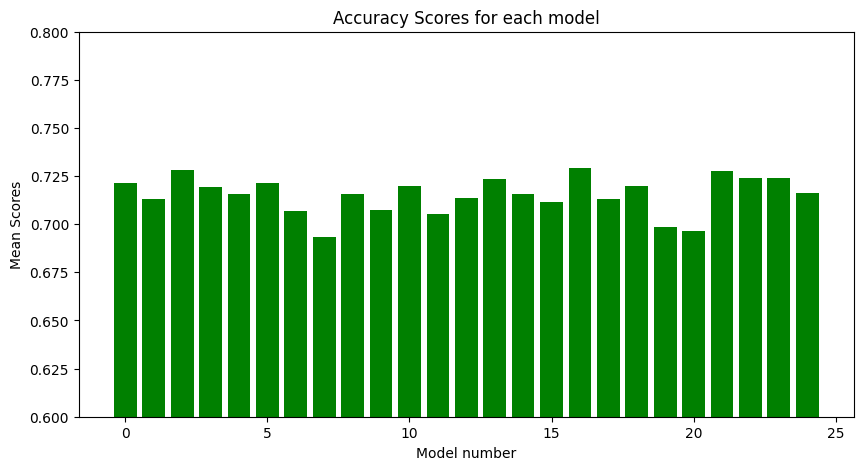

In [25]:
plt.figure(figsize=(10, 5))
m = range(25)
plt.bar(m, binary_accuracy1, color='green')
plt.xlabel('Model number')
plt.ylabel('Mean Scores')
plt.title('Accuracy Scores for each model')
plt.ylim(0.60, 0.80)
plt.show()

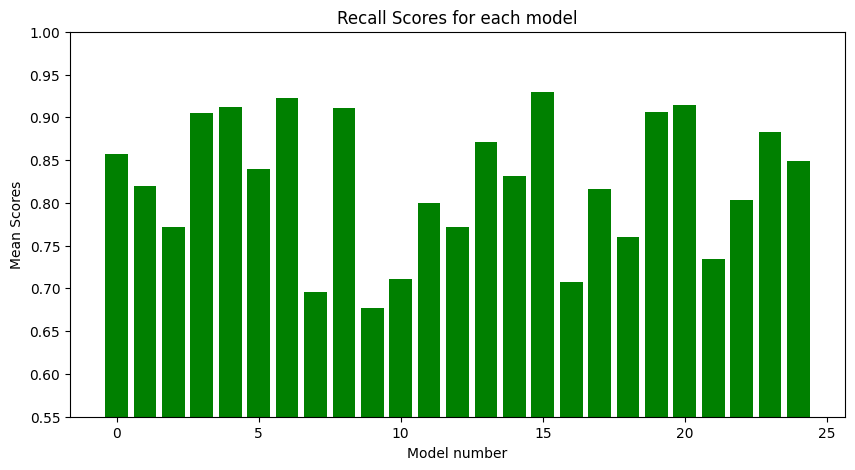

In [29]:
plt.figure(figsize=(10, 5))
m = range(25)
plt.bar(m, recall, color='green')
plt.xlabel('Model number')
plt.ylabel('Mean Scores')
plt.title('Recall Scores for each model')
plt.ylim(0.55, 1.0) 
plt.show()

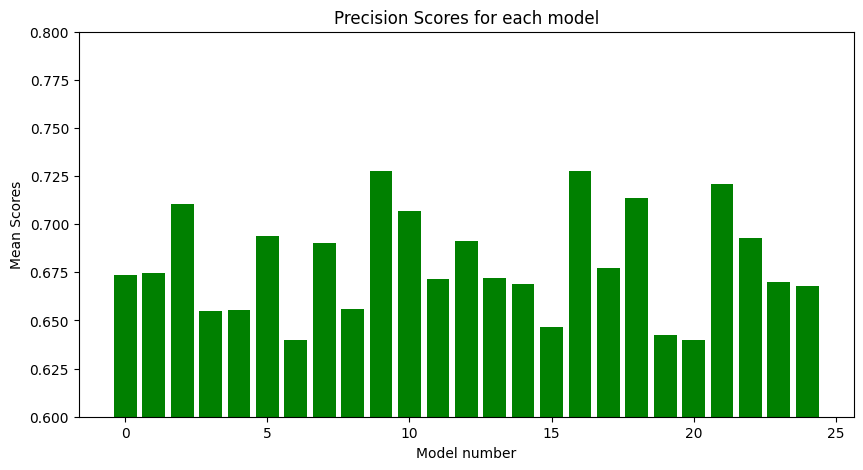

In [30]:
plt.figure(figsize=(10, 5))
m = range(25)
plt.bar(m, precision, color='green')
plt.xlabel('Model number')
plt.ylabel('Mean Scores')
plt.title('Precision Scores for each model')
plt.ylim(0.60, 0.80) 
plt.show()

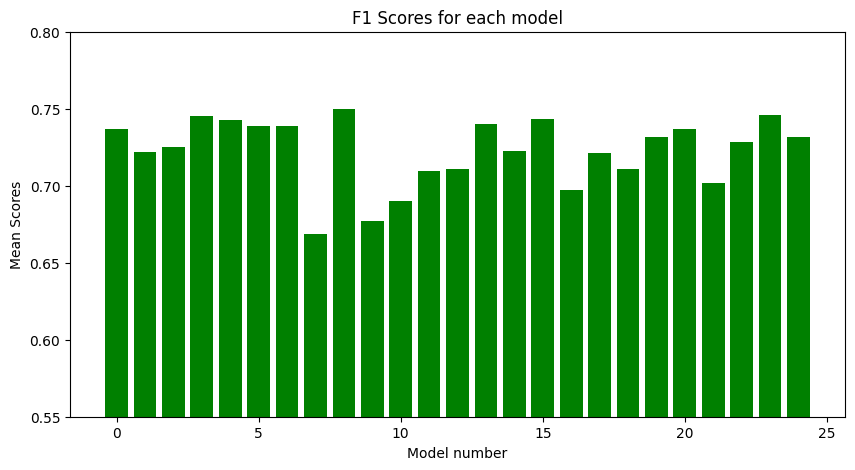

In [31]:
plt.figure(figsize=(10, 5))
m = range(25)
plt.bar(m, F1, color='green')
plt.xlabel('Model number')
plt.ylabel('Mean Scores')
plt.title('F1 Scores for each model')
plt.ylim(0.55, 0.8) 
plt.show()